## **Import Data from Kaggle**

In [ ]:
from google.colab import files

!pip install -q kaggle

In [ ]:
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d datatattle/covid-19-nlp-text-classification

  0% 0.00/4.38M [00:00<?, ?B/s]
100% 4.38M/4.38M [00:00<00:00, 72.4MB/s]


In [ ]:
!ls

covid-19-nlp-text-classification.zip  kaggle.json  sample_data


## **Extract Data**

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('covid-19-nlp-text-classification.zip', 'r')
zip_ref.extractall('SACorona')
zip_ref.close()

In [ ]:
! ls

covid-19-nlp-text-classification.zip  kaggle.json  SACorona  sample_data


## **Read Data**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
training_data = pd.read_csv('SACorona/Corona_NLP_train.csv', encoding='latin1', delimiter=',')
testing_data = pd.read_csv('SACorona/Corona_NLP_test.csv', encoding='latin1', delimiter=',')

In [ ]:
training_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
training_data.shape

(41157, 6)

In [ ]:
training_data.max()

UserName                                                     44955
ScreenName                                                   89907
TweetAt                                                 31-03-2020
OriginalTweet    Ã  As buyers stock up, exports of cereals, pr...
Sentiment                                                 Positive
dtype: object

In [ ]:
length = training_data['OriginalTweet'].str.split().str.len().max()
print(length)

64


In [ ]:
training_data.Sentiment.value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [ ]:
training_data.dtypes

UserName          int64
ScreenName        int64
Location         object
TweetAt          object
OriginalTweet    object
Sentiment        object
dtype: object

##**Preprocessing Data**

Column UserName, ScreenName and TweetAt not needed
Column Location have much a null value and anomaly on the value

In [ ]:
training_data.drop(['UserName', 'ScreenName', 'TweetAt', 'Location'], axis='columns', inplace=True)

training_data.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


###**Encode Original Tweet**

In [ ]:
training_data['OriginalTweet'] = training_data['OriginalTweet'].str.encode("ascii", "ignore")

In [ ]:
training_data['OriginalTweet'] = training_data['OriginalTweet'].str.decode("utf-8")
training_data.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
print(training_data['OriginalTweet'][0])

@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8


In [ ]:
# Drop duplicates
training_data.drop_duplicates(subset='OriginalTweet',inplace=True)

In [ ]:
import re
def remove_url(text):
    to_remove = ['\r','\n',',',';',':','.']
    
    out = re.sub(r'http\S+', '', text)
    
    for token in to_remove:
        out = out.replace(token, '')
    
    return re.sub(' +', ' ', out.lower())

In [ ]:
def remove_username(text):
    return re.sub("(@([A-Za-z0-9]|[A-Za-z0-9_])+)|([^0-9A-Za-z \t])|(\w+:_\/\/\S+)","",text)

In [ ]:
training_data['OriginalTweet'] = training_data['OriginalTweet'].apply(remove_url)
training_data.head(100)

,OriginalTweet,Sentiment
0,@menyrbie @phil_gahan @chrisitv and and,Neutral
1,advice talk to your neighbours family to excha...,Positive
2,coronavirus australia woolworths to give elder...,Positive
3,my food stock is not the only one which is emp...,Positive
4,me ready to go at supermarket during the #covi...,Extremely Negative
...,...,...
95,worried about covid-19? i more worried about p...,Extremely Positive
96,@kroger is the biggest supermarket chain in th...,Positive
97,@kroger instead of paid sick leave @kroger is ...,Positive
98,i followed this when i went shopping a few day...,Positive


In [ ]:
training_data['OriginalTweet'] = training_data['OriginalTweet'].apply(remove_username)
training_data.tail(100)

,OriginalTweet,Sentiment
41057,grocery store workers want more protections in...,Positive
41058,i doubt that iluminatis know the cure for co...,Negative
41059,fintwits keep talking amp comparing previous e...,Extremely Negative
41060,dont be a jerky shopper and get grocery store ...,Negative
41061,i was able to procure a threepack of puffs a b...,Positive
...,...,...
41152,airline pilots offering to stock supermarket s...,Neutral
41153,response to complaint not provided citing covi...,Extremely Negative
41154,you know its getting tough when is rationing ...,Positive
41155,is it wrong that the smell of hand sanitizer i...,Neutral


In [ ]:
training_data['OriginalTweet'] = training_data['OriginalTweet'].str.lower()
training_data.tail()

,OriginalTweet,Sentiment
41152,airline pilots offering to stock supermarket s...,Neutral
41153,response to complaint not provided citing covi...,Extremely Negative
41154,you know its getting tough when is rationing ...,Positive
41155,is it wrong that the smell of hand sanitizer i...,Neutral
41156,well newused rift s are going for 70000 on am...,Negative


In [ ]:
training_data.tail(15)

,OriginalTweet,Sentiment
41142,is worst than covid19 all businesses have r...,Extremely Positive
41143,5gtowers ecuadorunido cruiseships savethechil...,Neutral
41144,what does not having a supermarket nearby h...,Neutral
41145,how exactly are we going to reopen new york ci...,Positive
41146,gold prices rose to a more than 7year high tod...,Positive
41147,yall really shitting that much more at home co...,Negative
41148,uv light sterilizer sanitizer for your mask an...,Extremely Positive
41149,still shocked by the number of toronto superma...,Negative
41150,i never that wed be in a situation amp world t...,Positive
41151,you are definitely my man i feel like this fa...,Extremely Positive


In [ ]:
import spacy
#loading the english language small model of spacy
en = spacy.load('en_core_web_sm')
sw_spacy = en.Defaults.stop_words

def stopwords(text):
  words = [text for text in text.split() if text not in sw_spacy]
  new_text = " ".join(words)
  
  return new_text

In [ ]:
training_data['OriginalTweet'] = training_data['OriginalTweet'].apply(stopwords)
training_data.head(10)

,OriginalTweet,Sentiment
0,,Neutral
1,advice talk neighbours family exchange phone n...,Positive
2,coronavirus australia woolworths elderly disab...,Positive
3,food stock emptyplease dont panic food need st...,Positive
4,ready supermarket covid19 outbreaknot im paran...,Extremely Negative
5,news regions confirmed covid19 case came sulli...,Positive
6,cashier grocery store sharing insights covid19...,Positive
7,supermarket today didnt buy toilet paper rebel...,Neutral
8,covid19 retail store classroom atlanta open wa...,Positive
9,corona preventionwe stop buy things cash use o...,Negative


In [ ]:
training_data.tail()

,OriginalTweet,Sentiment
41152,airline pilots offering stock supermarket shel...,Neutral
41153,response complaint provided citing covid19 rel...,Extremely Negative
41154,know getting tough rationing toilet paper coro...,Positive
41155,wrong smell hand sanitizer starting turn oncor...,Neutral
41156,newused rift s going 70000 amazon rn normal ma...,Negative


In [ ]:
training_data['OriginalTweet'].replace('', np.nan, inplace=True)
training_data.head()

,OriginalTweet,Sentiment
0,and and,Neutral
1,advice talk to your neighbours family to excha...,Positive
2,coronavirus australia woolworths to give elder...,Positive
3,my food stock is not the only one which is emp...,Positive
4,me ready to go at supermarket during the covid...,Extremely Negative


In [ ]:
training_data.dropna(subset=['OriginalTweet'], how='any', inplace=True)
training_data.head()

,OriginalTweet,Sentiment
0,and and,Neutral
1,advice talk to your neighbours family to excha...,Positive
2,coronavirus australia woolworths to give elder...,Positive
3,my food stock is not the only one which is emp...,Positive
4,me ready to go at supermarket during the covid...,Extremely Negative


In [ ]:
training_data.tail(15)

,OriginalTweet,Sentiment
41142,is worst than covid19 all businesses have r...,Extremely Positive
41143,5gtowers ecuadorunido cruiseships savethechil...,Neutral
41144,what does not having a supermarket nearby h...,Neutral
41145,how exactly are we going to reopen new york ci...,Positive
41146,gold prices rose to a more than 7year high tod...,Positive
41147,yall really shitting that much more at home co...,Negative
41148,uv light sterilizer sanitizer for your mask an...,Extremely Positive
41149,still shocked by the number of toronto superma...,Negative
41150,i never that wed be in a situation amp world t...,Positive
41151,you are definitely my man i feel like this fa...,Extremely Positive


In [ ]:
label = training_data['Sentiment'].unique()
label

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [ ]:
category = pd.get_dummies(training_data['Sentiment'])
training_data = pd.concat([training_data, category], axis=1)
training_data = training_data.drop(columns='Sentiment')
training_data

,OriginalTweet,Extremely Negative,Extremely Positive,Negative,Neutral,Positive
0,and and,0,0,0,1,0
1,advice talk to your neighbours family to excha...,0,0,0,0,1
2,coronavirus australia woolworths to give elder...,0,0,0,0,1
3,my food stock is not the only one which is emp...,0,0,0,0,1
4,me ready to go at supermarket during the covid...,1,0,0,0,0
...,...,...,...,...,...,...
41152,airline pilots offering to stock supermarket s...,0,0,0,1,0
41153,response to complaint not provided citing covi...,1,0,0,0,0
41154,you know its getting tough when is rationing ...,0,0,0,0,1
41155,is it wrong that the smell of hand sanitizer i...,0,0,0,1,0


In [ ]:
training_data.shape

(41157, 6)

In [ ]:
training_data.reset_index(drop=True)
training_data.tail()

,OriginalTweet,Extremely Negative,Extremely Positive,Negative,Neutral,Positive
41152,airline pilots offering to stock supermarket s...,0,0,0,1,0
41153,response to complaint not provided citing covi...,1,0,0,0,0
41154,you know its getting tough when is rationing ...,0,0,0,0,1
41155,is it wrong that the smell of hand sanitizer i...,0,0,0,1,0
41156,well newused rift s are going for 70000 on am...,0,0,1,0,0


In [ ]:
label = training_data[['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive']].values
label

array([[0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       ...,
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0]], dtype=uint8)

In [ ]:
from sklearn.model_selection import train_test_split

training_data, validation_data, train_label, validation_label = train_test_split(training_data['OriginalTweet'].values, label, test_size=0.2, random_state=42)

In [ ]:
number_of_training = training_data.argmax()
number_of_validation = validation_data.argmax()

print(number_of_training)
print(number_of_validation)

28074
3465


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=16000, oov_token='oov')
tokenizer.fit_on_texts(training_data) 
tokenizer.fit_on_texts(validation_data)
 
training_seq = tokenizer.texts_to_sequences(training_data)
validation_seq = tokenizer.texts_to_sequences(validation_data)
 
train_padded = pad_sequences(training_seq) 
validation_padded = pad_sequences(validation_seq)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=16000, output_dim=512),
    tf.keras.layers.LSTM(256),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
num_epochs = 30
history = model.fit(train_padded, train_label, epochs=num_epochs, 
                    validation_data=(validation_padded, validation_label))

Epoch 1/30
1029/1029 [==============================] - 547s 529ms/step - loss: 1.0395 - accuracy: 0.5783 - val_loss: 0.7755 - val_accuracy: 0.7167
Epoch 2/30
1029/1029 [==============================] - 528s 513ms/step - loss: 0.5664 - accuracy: 0.7987 - val_loss: 0.6297 - val_accuracy: 0.7782
Epoch 3/30
1029/1029 [==============================] - 531s 516ms/step - loss: 0.3608 - accuracy: 0.8760 - val_loss: 0.6576 - val_accuracy: 0.7734
Epoch 4/30
1029/1029 [==============================] - 526s 512ms/step - loss: 0.2314 - accuracy: 0.9215 - val_loss: 0.7969 - val_accuracy: 0.7655
Epoch 5/30
1029/1029 [==============================] - 534s 519ms/step - loss: 0.1494 - accuracy: 0.9492 - val_loss: 0.9213 - val_accuracy: 0.7641
Epoch 6/30
1029/1029 [==============================] - 533s 518ms/step - loss: 0.0954 - accuracy: 0.9684 - val_loss: 1.1728 - val_accuracy: 0.7540
Epoch 7/30
1029/1029 [==============================] - 535s 520ms/step - loss: 0.0685 - accuracy: 0.9769 - val_

In [ ]:
train_acc = model.evaluate(train_padded, train_label)
val_acc = model.evaluate(validation_padded, validation_label)
print(train_acc)
print(val_acc)

258/258 [==============================] - 22s 87ms/step - loss: 1.9130 - accuracy: 0.7228
[0.004227727651596069, 0.9988154768943787]
[1.9130361080169678, 0.7227891087532043]


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

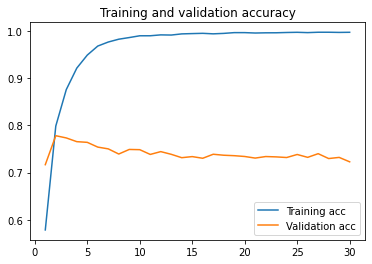

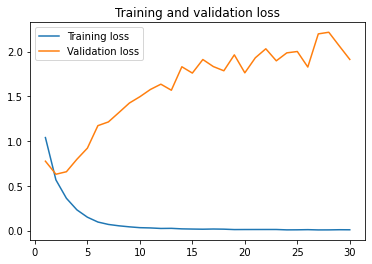

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
